In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



In [ ]:
#load dataset
data = pd.read_csv('/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

#1. Analisa decriptive statistic

-> Berapa rata - rata umur pada data tersebut

-> Berapa rata - rata nilai BMI dari yang merokok

-> Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

-> Rata - rata tagihan kesehatan perokok atau non merokok

-> Rata - rata tagihan kesehatan perokok yang BMI nya di atas 25 atau non perokok yang BMI nya di atas 25(overweight)

Rata - rata umur: 39.207


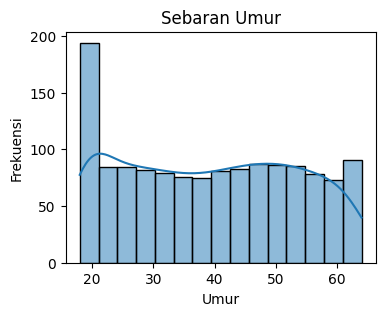

In [ ]:
#Berapa rata - rata umur pada data tersebut

rata_rata_umur = data['age'].mean().round(3)
print('Rata - rata umur:',rata_rata_umur)

plt.figure(figsize=(4,3))
sns.histplot(data['age'], bins=15, kde=True)
plt.title("Sebaran Umur")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

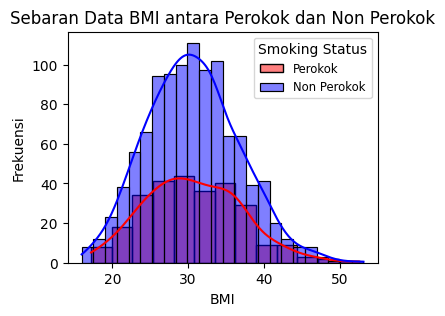

In [ ]:
# Membuat histogram untuk data BMI perokok dan non perokok
bmi_smoker = data[data['smoker'] == 'yes']['bmi']
bmi_non_smoker = data[data['smoker'] == 'no']['bmi']

plt.figure(figsize=(4,3))
sns.histplot(data=bmi_smoker, color='red', label='Perokok', kde=True)
sns.histplot(data=bmi_non_smoker, color='blue', label='Non Perokok', kde=True)

plt.legend(title='Smoking Status', fontsize='small')

plt.title("Sebaran Data BMI antara Perokok dan Non Perokok")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")

plt.show()

Rata-rata BMI Perokok: 30.708
Rata-rata BMI Bukan Perokok: 30.652


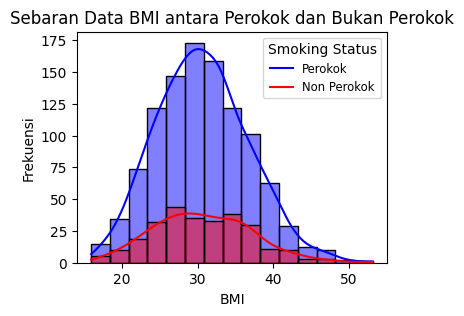

In [ ]:
#Berapa rata - rata nilai BMI dari perokok dan bukan perkokok

# Menghitung rata-rata BMI untuk perokok
rata_rata_bmi_perokok = data[data['smoker'] == 'yes']['bmi'].mean().round(3)

# Menghitung rata-rata BMI untuk bukan perokok
rata_rata_bmi_bukan_perokok = data[data['smoker'] == 'no']['bmi'].mean().round(3)

print("Rata-rata BMI Perokok:", rata_rata_bmi_perokok)
print("Rata-rata BMI Bukan Perokok:", rata_rata_bmi_bukan_perokok)

# Membuat histogram sebaran data BMI antara perokok dan bukan perokok
plt.figure(figsize=(4,3))
sns.histplot(data=data, x='bmi', hue='smoker', bins=15, kde=True, palette={"yes": "red", "no": "blue"})
plt.title("Sebaran Data BMI antara Perokok dan Bukan Perokok")
plt.xlabel("BMI")
plt.ylabel("Frekuensi")
plt.legend(title='Smoking Status', labels=['Perokok', 'Non Perokok'], fontsize='small')
plt.show()

In [ ]:
#Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

# Menghitung variansi tagihan kesehatan untuk perokok dan non-perokok
variance_perokok = data[data['smoker'] == 'yes']['charges'].var().round(3)
variance_non_perokok = data[data['smoker'] == 'no']['charges'].var().round(3)

print("Variansi Tagihan Kesehatan Perokok:", variance_perokok)
print("Variansi Tagihan Kesehatan Non Perokok:", variance_non_perokok)

Variansi Tagihan Kesehatan Perokok: 133207311.206
Variansi Tagihan Kesehatan Non Perokok: 35925420.496




1.   Perbedaan Variabilitas: Variansi tagihan kesehatan pada kelompok perokok (133,207,311.21) lebih tinggi daripada kelompok non-perokok (35,925,420.50). Hal ini menunjukkan bahwa tagihan kesehatan pada kelompok perokok lebih bervariasi dibandingkan dengan kelompok non-perokok.
2. Lebih Tingginya Risiko Keuangan: Variabilitas yang lebih tinggi dalam tagihan kesehatan perokok dapat menunjukkan adanya risiko keuangan yang lebih tinggi dalam kelompok perokok. Ini bisa disebabkan oleh biaya perawatan kesehatan yang lebih tinggi atau risiko kesehatan yang lebih besar bagi perokok.  
3.   Pertimbangan Asuransi: Pihak asuransi mungkin perlu mempertimbangkan variasi ini saat menetapkan premi asuransi. Kelompok dengan variabilitas yang lebih tinggi mungkin memerlukan premi yang lebih tinggi untuk mengatasi potensi biaya kesehatan yang lebih tinggi.

In [ ]:
# Hitung rata-rata tagihan kesehatan perokok
rata_rata_perokok = data[data['smoker'] == 'yes']['charges'].mean().round(3)

# Hitung rata-rata tagihan kesehatan non perokok
rata_rata_non_perokok = data[data['smoker'] == 'no']['charges'].mean().round(3)

# Tampilkan hasil
print("Rata-rata Tagihan Kesehatan Perokok:", rata_rata_perokok)
print("Rata-rata Tagihan Kesehatan Non Perokok:", rata_rata_non_perokok)

Rata-rata Tagihan Kesehatan Perokok: 32050.232
Rata-rata Tagihan Kesehatan Non Perokok: 8434.268


In [ ]:
# Hitung rata-rata tagihan kesehatan perokok dengan BMI di atas 25
rata_rata_perokok_bmi_atas_25 = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]['charges'].mean().round(3)

# Hitung rata-rata tagihan kesehatan non perokok dengan BMI di atas 25
rata_rata_non_perokok_bmi_atas_25 = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]['charges'].mean().round(3)

# Tampilkan hasil
print("Rata-rata Tagihan Kesehatan Perokok (BMI > 25):", rata_rata_perokok_bmi_atas_25)
print("Rata-rata Tagihan Kesehatan Non Perokok (BMI > 25):", rata_rata_non_perokok_bmi_atas_25)

Rata-rata Tagihan Kesehatan Perokok (BMI > 25): 35116.91
Rata-rata Tagihan Kesehatan Non Perokok (BMI > 25): 8629.59


#2. Analisa variable diskrit
1. Gender mana yang memiliki tagihan paling tinggi
2. Mana yang lebih tinggi proporsi perokok atau non perokok
3. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok
4. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok
5. Distribusi peluang tagihan di tiap - tiap region

In [ ]:
# Menghitung rata-rata tagihan per gender
rata_rata_tagihan_per_gender = data.groupby('sex')['charges'].mean()
rata_rata_tagihan_per_gender = rata_rata_tagihan_per_gender.round(3)
print(rata_rata_tagihan_per_gender)

sex
female    12569.579
male      13956.751
Name: charges, dtype: float64


In [ ]:
# Menemukan gender dengan tagihan tertinggi
gender_dengan_tagihan_tertinggi = rata_rata_tagihan_per_gender.idxmax()
tagihan_tertinggi = rata_rata_tagihan_per_gender.max()

print("Gender dengan Tagihan Tertinggi:", gender_dengan_tagihan_tertinggi)
print("Rata-rata Tagihan Tertinggi:", tagihan_tertinggi)

Gender dengan Tagihan Tertinggi: male
Rata-rata Tagihan Tertinggi: 13956.751


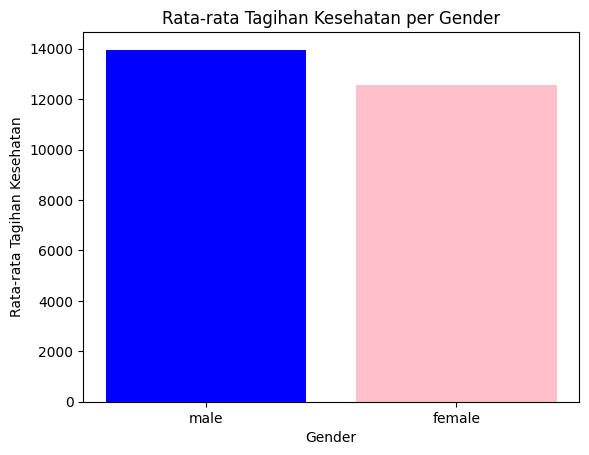

In [ ]:
# Urutkan berdasarkan nilai rata-rata tagihan secara menurun
rata_rata_tagihan_per_gender_sorted = rata_rata_tagihan_per_gender.sort_values(ascending=False)

# Warna untuk setiap gender
colors = ['blue' if gender == 'male' else 'pink' for gender in rata_rata_tagihan_per_gender_sorted.index]

# Visualisasi rata-rata tagihan per gender dengan perbedaan warna
plt.bar(rata_rata_tagihan_per_gender_sorted.index, rata_rata_tagihan_per_gender_sorted.values, color=colors)
plt.title("Rata-rata Tagihan Kesehatan per Gender")
plt.xlabel("Gender")
plt.ylabel("Rata-rata Tagihan Kesehatan")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Uji t-test untuk perbandingan rata-rata tagihan antara gender
male_charges = data[data['sex'] == 'male']['charges']
female_charges = data[data['sex'] == 'female']['charges']
t_statistic, p_value = ttest_ind(male_charges, female_charges)

print("Rata-rata Tagihan Kesehatan (Male):", rata_rata_tagihan_per_gender['male'])
print("Rata-rata Tagihan Kesehatan (Female):", rata_rata_tagihan_per_gender['female'])
print("Nilai p-value dari uji t-test:", p_value)

if p_value < 0.05:
    print("Perbedaan tagihan kesehatan antara gender signifikan secara statistik.")
else:
    print("Tidak terdapat perbedaan signifikan dalam tagihan kesehatan antara gender.")

Rata-rata Tagihan Kesehatan (Male): 13956.751
Rata-rata Tagihan Kesehatan (Female): 12569.579
Nilai p-value dari uji t-test: 0.03613272100592976
Perbedaan tagihan kesehatan antara gender signifikan secara statistik.




1.   Perbedaan Rata - rata tagihan: Rata - rata tagihan kesehatan pada kelompok pria lebih tinggi dibandingkan dengan kelompok wanita
2.   Signifikansi statistik: Nilai p-value dari uji t-test adalah 0.03613, yang lebih kecil dari level signifikansi umum (biasanya 0.05). Hal ini menunjukkan bahwa perbedaan rata-rata tagihan antara gender dianggap signifikan secara statistik.

Namun walaupun memiliki perbedaan signifikan secara statistik, ini belum tentu berarti perbedaan tersebut memiliki relevansi praktis atau klinis. Perbedaan rata-rata tagihan sekitar 1387.17 (13956.75 - 12569.58) mungkin memiliki dampak yang relatif kecil dalam konteks tagihan kesehatan yang mungkin memiliki variasi yang lebih besar.


Proporsi Perokok: 0.205
Proporsi Non Perokok: 0.795


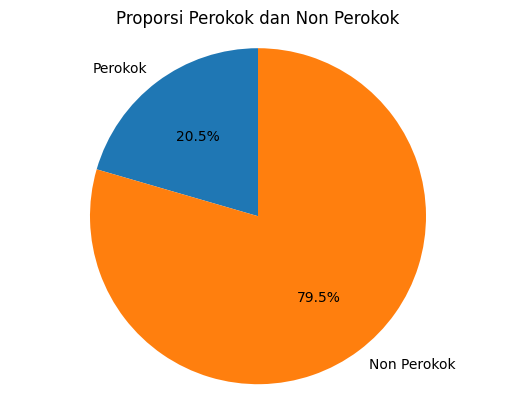

In [ ]:
#Mana yang lebih tinggi proporsi perokok atau non perokok

# Menghitung proporsi perokok dan non-perokok
proporsi_perokok = (data['smoker'] == 'yes').mean().round(3)
proporsi_non_perokok = (data['smoker'] == 'no').mean().round(3)

print("Proporsi Perokok:", proporsi_perokok)
print("Proporsi Non Perokok:", proporsi_non_perokok)

# Visualisasi proporsi perokok dan non-perokok
labels = ['Perokok', 'Non Perokok']
sizes = [proporsi_perokok, proporsi_non_perokok]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proporsi Perokok dan Non Perokok")
plt.axis('equal')  # Membuat lingkaran berukuran proporsional
plt.show()

In [ ]:
# Uji chi-square untuk perbandingan proporsi perokok dan non-perokok (opsional)
contingency_table = pd.crosstab(data['smoker'], columns='count')
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Nilai p-value dari uji chi-square:", p_value)

if p_value < 0.05:
    print("Perbedaan proporsi perokok dan non-perokok signifikan secara statistik.")
else:
    print("Tidak terdapat perbedaan signifikan dalam proporsi perokok dan non-perokok.")

Nilai p-value dari uji chi-square: 1.0
Tidak terdapat perbedaan signifikan dalam proporsi perokok dan non-perokok.


Dari nilai p-value yang diperoleh dari uji chi-square (1.0), informasi yang dapat disimpulkan adalah bahwa tidak terdapat perbedaan signifikan dalam proporsi antara perokok dan non-perokok dalam dataset tersebut. Dengan kata lain, proporsi perokok dan proporsi non-perokok dalam dataset tidak berbeda secara signifikan secara statistik.

Dalam konteks ini, jika nilai p-value lebih besar dari tingkat signifikansi yang telah ditentukan (biasanya 0.05), kita tidak memiliki cukup bukti statistik untuk menyimpulkan bahwa proporsi perokok dan non-perokok berbeda secara signifikan. Oleh karena itu, hasil uji chi-square menunjukkan bahwa dalam dataset ini, perbedaan proporsi antara perokok dan non-perokok tidak memiliki dampak yang signifikan dari segi statistik.

In [ ]:
#Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok

# Menghitung jumlah perokok perempuan
jumlah_perokok_perempuan = data[(data['smoker'] == 'yes') & (data['sex'] == 'female')].shape[0]

# Menghitung total jumlah perokok
total_perokok = data[data['smoker'] == 'yes'].shape[0]

# Menghitung peluang perempuan jika diketahui perokok
peluang_female_given_smoker = round((jumlah_perokok_perempuan / total_perokok),3)

print("Peluang Female | Smoker:", peluang_female_given_smoker)

Peluang Female | Smoker: 0.42


In [ ]:
#Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok
# Menghitung jumlah perokok laki-laki
jumlah_perokok_laki = data[(data['smoker'] == 'yes') & (data['sex'] == 'male')].shape[0]

# Menghitung total jumlah perokok
total_perokok = data[data['smoker'] == 'yes'].shape[0]

# Menghitung peluang laki-laki jika diketahui perokok
peluang_male_given_smoker = round((jumlah_perokok_laki / total_perokok),3)

print("Peluang Male | Smoker:", peluang_male_given_smoker)

Peluang Male | Smoker: 0.58


#3 Analisa variable kontinu

1. Mana yang lebih mungkin terjadi:
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.17k

2. Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [ ]:
'''
Analisa variabel kontinu
Mana yang lebih mungkin terjadi:
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.17k
'''

# Menghitung proporsi individu yang memenuhi kondisi a
kondisi_a = data[(data['bmi'] > 25) & (data['charges'] > 16170)]
proporsi_kondisi_a = round((kondisi_a.shape[0] / data.shape[0]),3)


# Menghitung proporsi individu yang memenuhi kondisi b
kondisi_b = data[(data['bmi'] < 25) & (data['charges'] > 16170)]
proporsi_kondisi_b = round((kondisi_b.shape[0] / data.shape[0]),3)

# Membandingkan proporsi
if proporsi_kondisi_a > proporsi_kondisi_b:
    lebih_mungkin = "a (BMI di atas 25)"
else:
    lebih_mungkin = "b (BMI di bawah 25)"

print("Proporsi Kondisi a:", proporsi_kondisi_a)
print("Proporsi Kondisi b:", proporsi_kondisi_b)
print("Mana yang lebih mungkin terjadi:", lebih_mungkin)



Proporsi Kondisi a: 0.215
Proporsi Kondisi b: 0.04
Mana yang lebih mungkin terjadi: a (BMI di atas 25)


In [ ]:
X = data['bmi']  # Variabel independen: BMI
y = (data['charges'] > 16170).astype(int)  # Variabel dependen: 1 jika tagihan di atas 16170, 0 jika tidak

X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.567013
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                charges   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1336
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                0.002458
Time:                        02:50:29   Log-Likelihood:                -758.66
converged:                       True   LL-Null:                       -760.53
Covariance Type:            nonrobust   LLR p-value:                   0.05317
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6800      0.324     -5.189      0.000      -2.315      -1.045
bmi            0.0198      0.

In [ ]:
'''
Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
'''

# Menghitung proporsi individu yang memenuhi kondisi a
kondisi_a = data[(data['smoker'] == 'yes') & (data['bmi'] > 25) & (data['charges'] > 16700)]
proporsi_kondisi_a = round((kondisi_a.shape[0] / data.shape[0]),3)

# Menghitung proporsi individu yang memenuhi kondisi b
kondisi_b = data[(data['smoker'] == 'no') & (data['bmi'] > 25) & (data['charges'] > 16700)]
proporsi_kondisi_b = round((kondisi_b.shape[0] / data.shape[0]),3)

# Membandingkan proporsi
if proporsi_kondisi_a > proporsi_kondisi_b:
    lebih_mungkin = "a (Seseorang perokok dengan BMI di atas 25)"
else:
    lebih_mungkin = "b (Seseorang non perokok dengan BMI di atas 25)"

print("Proporsi Kondisi a:", proporsi_kondisi_a)
print("Proporsi Kondisi b:", proporsi_kondisi_b)
print("Mana yang lebih mungkin terjadi:", lebih_mungkin)

Proporsi Kondisi a: 0.161
Proporsi Kondisi b: 0.051
Mana yang lebih mungkin terjadi: a (Seseorang perokok dengan BMI di atas 25)


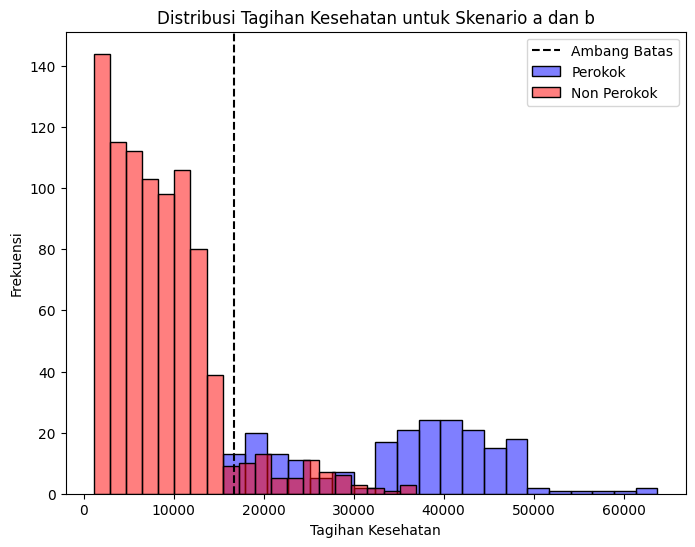

In [ ]:
# Filter data untuk kedua kelompok (perokok dan non perokok) dengan BMI di atas 25
group_a = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]
group_b = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]

# Ambang batas tagihan
threshold = 16700

# Visualisasi distribusi tagihan kesehatan
plt.figure(figsize=(8, 6))
sns.histplot(data=group_a, x='charges', bins=20, color='blue', alpha=0.5, label='Perokok')
sns.histplot(data=group_b, x='charges', bins=20, color='red', alpha=0.5, label='Non Perokok')
plt.axvline(x=threshold, color='black', linestyle='--', label='Ambang Batas')
plt.title("Distribusi Tagihan Kesehatan untuk Skenario a dan b")
plt.xlabel("Tagihan Kesehatan")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

In [ ]:
perokok_bmi_tinggi = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]
non_perokok_bmi_tinggi = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]

t_statistic, p_value = stats.ttest_ind(perokok_bmi_tinggi['charges'], non_perokok_bmi_tinggi['charges'], equal_var=False)

alpha = 0.05  # Ambang signifikansi

if p_value < alpha:
    conclusion = "Terdapat bukti yang cukup untuk menolak H0"
else:
    conclusion = "Tidak terdapat bukti yang cukup untuk menolak H0"

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Kesimpulan:", conclusion)

T-Statistic: 35.24194718592808
P-Value: 9.197221914779368e-100
Kesimpulan: Terdapat bukti yang cukup untuk menolak H0


#4 Analisa korelasi variable

In [ ]:
'''
Karena objective dari analisa ini adalah
untuk mengetahui variable yang memiliki hubungan dengan
tagihan kesehatan dan memberikan gambaran
karakteristik pengguna dengan tagihan kesehatan tinggi
maka akan dilakukan analisis korelasi antara variabel-variabel
(umur, BMI, jumlah anak, merokok, wilayah) dengan tagihan kesehatan.
'''

# Pilih variabel yang ingin Anda analisis
selected_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
selected_data = data[selected_columns]

# Hitung matriks korelasi
correlation_matrix = selected_data.corr()

# Korelasi variabel dengan charges
correlation_with_charges = correlation_matrix['charges'].drop('charges')

print(correlation_with_charges)

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


<ipython-input-23-a58cba676d32>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


In [ ]:
# Urutkan data berdasarkan tagihan secara menurun
sorted_data = data.sort_values(by='charges', ascending=False)

# Tampilkan 5 tagihan tertinggi beserta karakteristiknya
top_5_charges = sorted_data.head(5)

print(top_5_charges)

      age     sex     bmi  children smoker     region      charges
543    54  female  47.410         0    yes  southeast  63770.42801
1300   45    male  30.360         0    yes  southeast  62592.87309
1230   52    male  34.485         3    yes  northwest  60021.39897
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209


In [ ]:
correlation_matrix = data.corr()
correlation_with_charges = correlation_matrix['charges'].sort_values(ascending=False)

print(correlation_with_charges)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


<ipython-input-25-543850702900>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
#analisis regresi linear

# Encode variabel kategori 'merokok' dan 'wilayah' menjadi variabel dummy
data_encoded = pd.get_dummies(data, columns=['smoker', 'region'], drop_first=True)

# Definisikan variabel independen (X) dan dependen (y)
X = data_encoded[['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = data_encoded['charges']

# Tambahkan konstanta ke variabel independen (X)
X = sm.add_constant(X)

# Buat model regresi linear
model = sm.OLS(y, X).fit()

# Tampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:51:38   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.199e+04    978.762  

In [ ]:
# Encode variabel kategori 'merokok' dan 'wilayah' menjadi variabel dummy
data_encoded = pd.get_dummies(data, columns=['smoker', 'region'], drop_first=True)

# Definisikan variabel independen (X) dan dependen (y)
X = data_encoded[['age', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = data_encoded['charges']

# Tambahkan konstanta ke variabel independen (X)
X = sm.add_constant(X)

# Buat model regresi linear
model = sm.OLS(y, X).fit()

# Hitung matriks korelasi parcial
partial_corr_matrix = np.linalg.inv(np.dot(X.T, X)).diagonal()

# Tampilkan matriks korelasi parcial
print("Matriks Korelasi Parsial:")
print(partial_corr_matrix)

Matriks Korelasi Parsial:
[2.60845346e-02 3.85027992e-06 2.22082257e-05 5.16594069e-04
 4.61871383e-03 6.17252648e-03 6.23535035e-03 6.21558443e-03]


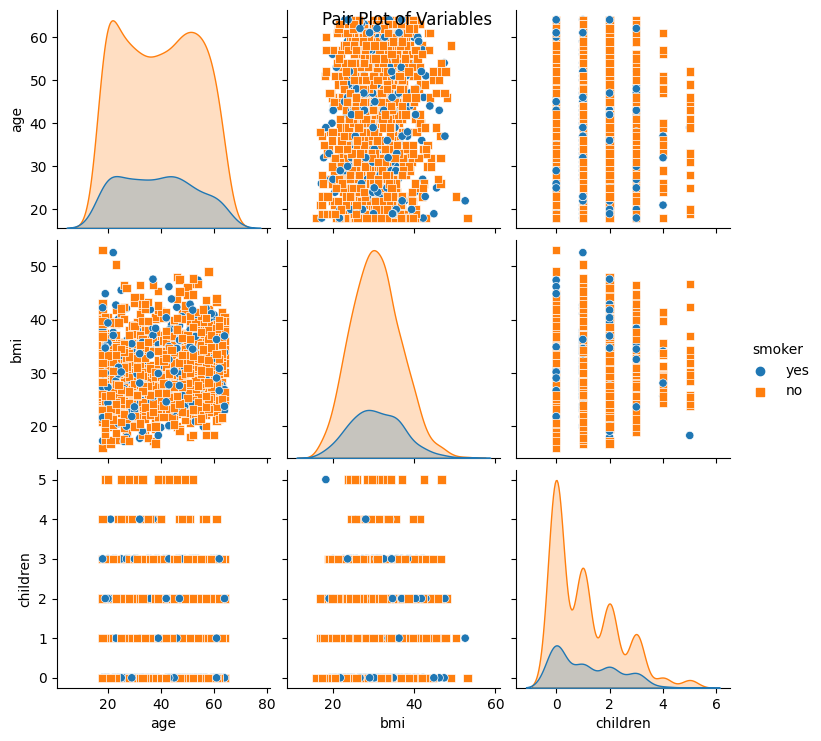

In [ ]:
# Buat pair plot
sns.pairplot(data, vars=['age', 'bmi', 'children'], hue='smoker', diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pair Plot of Variables")
plt.show()

In [ ]:
# Hitung matriks korelasi Pearson
correlation_matrix = data[['age', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()

# Tampilkan matriks korelasi Pearson
print("Matriks Korelasi Pearson:")
print(correlation_matrix)

Matriks Korelasi Pearson:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<ipython-input-28-f0de4e69da37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[['age', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()


Pengujian hipetesis:
1. Tagihan Kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
3. Tagihan kesehatan laki - laki lebih besar dari perempuan

In [ ]:
#Pengujian Hipotesis

#1. Tagihan Kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
'''
Untuk menguji hipotesis bahwa tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
dapat menggunakan uji statistik t-test independen. Dalam hal ini,
hipotesis nol (H0) adalah bahwa tidak ada perbedaan signifikan antara tagihan kesehatan perokok dan non perokok,
sementara hipotesis alternatif (H1) adalah bahwa tagihan kesehatan perokok lebih tinggi daripada non perokok.
'''
# Pisahkan data tagihan kesehatan perokok dan non perokok
charges_perokok = data[data['smoker'] == 'yes']['charges']
charges_non_perokok = data[data['smoker'] == 'no']['charges']

# Lakukan uji t-test independen
t_statistic, p_value = stats.ttest_ind(charges_perokok, charges_non_perokok)

# Tampilkan hasil uji t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretasi hasil uji t-test
alpha = 0.05
if p_value < alpha:
    print("P-Value < Alpha: Terdapat bukti yang cukup untuk menolak H0")
else:
    print("P-Value >= Alpha: Tidak terdapat bukti yang cukup untuk menolak H0")

T-Statistic: 46.66492117272371
P-Value: 8.271435842179102e-283
P-Value < Alpha: Terdapat bukti yang cukup untuk menolak H0


In [ ]:
'''
Pengujian Hipotesis 1 menggunakan Anova
'''
perokok = data[data['smoker'] == 'yes']['charges']
non_perokok = data[data['smoker'] == 'no']['charges']

F_statistic, p_value = stats.f_oneway(perokok, non_perokok)

print("F-Statistic:", F_statistic)
print("P-Value:", p_value)

F-Statistic: 2177.614868056519
P-Value: 8.271435842182967e-283


T-Statistic: 4.319946909530397
P-Value: 1.6761321969419405e-05
P-Value < Alpha
Ini menunjukkan bahwa status merokok memiliki pengaruh yang signifikan terhadap tagihan kesehatan dalam dataset ini

In [ ]:
above_25 = data[data['bmi'] > 25]['charges']
below_25 = data[data['bmi'] <= 25]['charges']

# Lakukan uji t-test
t_statistic, p_value = stats.ttest_ind(above_25, below_25)

# Tentukan tingkat signifikansi (alpha)
alpha = 0.05

# Bandingkan p-value dengan alpha
if p_value < alpha:
    conclusion = "Terdapat bukti yang cukup untuk menolak H0"
else:
    conclusion = "Tidak cukup bukti untuk menolak H0"

# Print hasil
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Kesimpulan:", conclusion)

T-Statistic: 4.319946909530397
P-Value: 1.6761321969419405e-05
Kesimpulan: Terdapat bukti yang cukup untuk menolak H0


In [ ]:
#Pengujian Hipotesis
#2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

# Pisahkan data tagihan kesehatan untuk BMI di atas 25 dan di bawah 25
charges_above_25 = data[data['bmi'] > 25]['charges']
charges_below_25 = data[data['bmi'] <= 25]['charges']

# Lakukan uji t-test independen
t_statistic, p_value = stats.ttest_ind(charges_above_25, charges_below_25)

# Tampilkan hasil uji t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretasi hasil uji t-test
alpha = 0.05
if p_value < alpha:
    print("P-Value < Alpha: Terdapat bukti yang cukup untuk menolak H0")
else:
    print("P-Value >= Alpha: Tidak terdapat bukti yang cukup untuk menolak H0")



T-Statistic: 4.319946909530397
P-Value: 1.6761321969419405e-05
P-Value < Alpha: Terdapat bukti yang cukup untuk menolak H0


In [ ]:
# Pisahkan data tagihan kesehatan untuk kelompok BMI di atas 25 dan di bawah 25
tagihan_bmi_above_25 = data[data['bmi'] > 25]['charges']
tagihan_bmi_below_25 = data[data['bmi'] <= 25]['charges']

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(tagihan_bmi_above_25, tagihan_bmi_below_25)

print("F-Statistic:", F_statistic)
print("P-Value:", p_value)

F-Statistic: 2177.614868056519
P-Value: 1.6761321969433625e-05


In [ ]:
#pengujian hipotesis
#Tagihan kesehatan laki - laki lebih besar dari perempuan

data_laki = data[data['sex'] == 'male']['charges']
data_perempuan = data[data['sex'] == 'female']['charges']

mean_laki = data_laki.mean()
std_dev_laki = data_laki.std()

mean_perempuan = data_perempuan.mean()
std_dev_perempuan = data_perempuan.std()

t_statistic, p_value = stats.ttest_ind(data_laki, data_perempuan)
alpha = 0.05

if p_value < alpha:
    conclusion = "Ada cukup bukti untuk menolak H0, jadi tagihan kesehatan laki-laki lebih besar dari perempuan."
else:
    conclusion = "Tidak cukup bukti untuk menolak H0, jadi tidak ada perbedaan signifikan antara tagihan kesehatan laki-laki dan perempuan."

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Kesimpulan:", conclusion)

T-Statistic: 2.097546590051688
P-Value: 0.03613272100592976
Kesimpulan: Ada cukup bukti untuk menolak H0, jadi tagihan kesehatan laki-laki lebih besar dari perempuan.


In [ ]:
#Pengujian dengan ANOVA
F_statistic, p_value = stats.f_oneway(data_laki, data_perempuan)

print("F-Statistic:", F_statistic)
print("P-Value:", p_value)

F-Statistic: 4.3997016974374565
P-Value: 0.03613272100596256
